In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
from transformers import LongformerTokenizer, LongformerModel
import torch
from sklearn.model_selection import train_test_split
import numpy as np

In [60]:
df_sub = pd.read_csv('/Users/jeremytournellec/Desktop/data/sample_submission.csv')
df_test = pd.read_csv('/Users/jeremytournellec/Desktop/data/test_essays.csv')
df_train = pd.read_csv('/Users/jeremytournellec/Desktop/data/train_essays.csv')
df_train_prompt = pd.read_csv('/Users/jeremytournellec/Desktop/data/train_prompts.csv')

*** Exploratoire ***

In [61]:
df_sub.head()

,id,generated
0,0000aaaa,0.1
1,1111bbbb,0.9
2,2222cccc,0.4


In [62]:
df_test.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [63]:
df_train.head(20)

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
5,00da8c32,1,The electrol college system is an unfair syste...,0
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0
7,01448434,0,"Fellow citizens, cars have become a major role...",0
8,01c6e176,1,"""It's official: The electoral college is unfai...",0
9,0202ddf9,1,The Electoral College has been kept for centur...,0


In [64]:
df_train.nunique()

id           1378
prompt_id       2
text         1378
generated       2
dtype: int64

In [65]:
df_train['length']=df_train['text'].str.len()

<Axes: xlabel='length', ylabel='Count'>

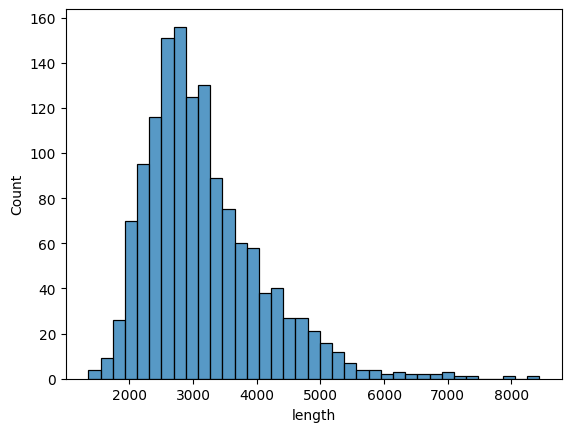

In [66]:
sns.histplot(df_train, x = 'length')

In [18]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [68]:
df_train['word_count'] = df_train['text'].apply(word_count)
df_train.head()

,id,prompt_id,text,generated,length,word_count
0,0059830c,0,Cars. Cars have been around since they became ...,0,3289,584
1,005db917,0,Transportation is a large necessity in most co...,0,2738,462
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,4428,744
3,00940276,0,How often do you ride in a car? Do you drive a...,0,4013,686
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,4698,871


<Axes: xlabel='word_count', ylabel='Count'>

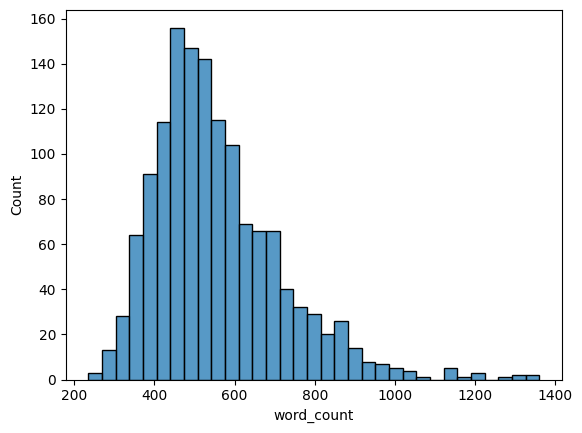

In [69]:
sns.histplot(df_train, x = 'word_count')

In [70]:
df_train[df_train['prompt_id']==0].head(10)

,id,prompt_id,text,generated,length,word_count
0,0059830c,0,Cars. Cars have been around since they became ...,0,3289,584
1,005db917,0,Transportation is a large necessity in most co...,0,2738,462
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,4428,744
3,00940276,0,How often do you ride in a car? Do you drive a...,0,4013,686
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,4698,871
7,01448434,0,"Fellow citizens, cars have become a major role...",0,2470,440
11,037352a5,0,"""When I had a car I was always tense. I'm much...",0,3785,633
14,03cabe10,0,Everyone wants to go to the park with their ch...,0,3791,675
15,03ed46ca,0,There are many advantages to limiting car usag...,0,3873,628
17,04356693,0,Transportation has become one of the largest e...,0,1897,326


<Axes: xlabel='word_count', ylabel='Count'>

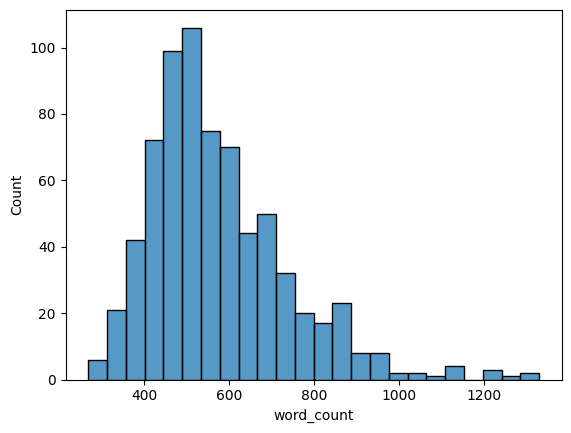

In [71]:
sns.histplot(df_train[df_train['prompt_id']==0], x = 'word_count')

<Axes: xlabel='word_count', ylabel='Count'>

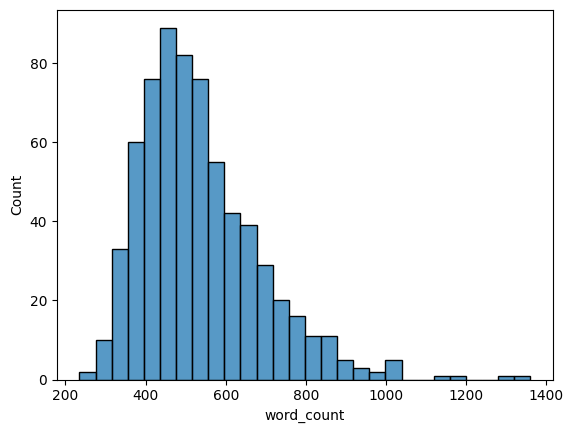

In [72]:
sns.histplot(df_train[df_train['prompt_id']==1], x = 'word_count')

In [73]:
df_train[df_train['prompt_id']==1].head(10)

,id,prompt_id,text,generated,length,word_count
5,00da8c32,1,The electrol college system is an unfair syste...,0,3311,582
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0,2551,432
8,01c6e176,1,"""It's official: The electoral college is unfai...",0,2707,471
9,0202ddf9,1,The Electoral College has been kept for centur...,0,3290,569
10,020a5d6d,1,"Dear senator, Retain the Electoral College. Th...",0,2159,354
12,03a3377a,1,Voting for a president is one of the most impo...,0,2723,511
13,03c28f3e,1,"dear senator, I have come to a conclusion on h...",0,2349,435
16,03f7c6e9,1,"dear state senator, i believe that we should a...",0,2042,368
20,04da0c54,1,The system of the Electoral College is a widel...,0,3836,691
21,04effeb0,1,"Dear Senator, Many people might agree theat we...",0,5870,1008


<Axes: xlabel='prompt_id', ylabel='text'>

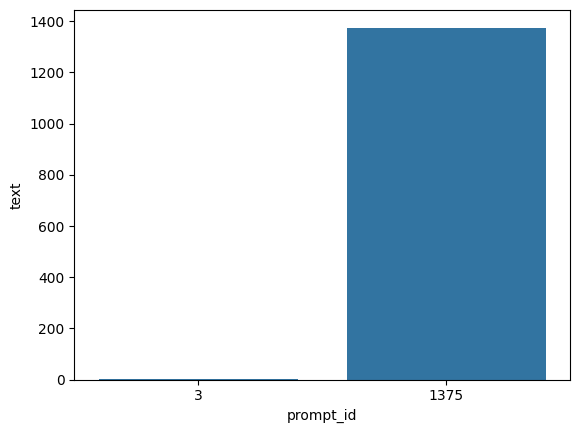

In [75]:
sns.barplot(df_train.groupby('generated').count(), x='prompt_id', y='text')

le dataset est ultra désequilibré

In [84]:
text_ai = df_train[df_train['prompt_id']==1].sample(1)['text'].iloc[0] #sample pour en choisir un au hasard
text_humain = df_train[df_train['prompt_id']==0].sample(1)['text'].iloc[0] #sample pour en choisir un au hasard

In [85]:
print(text_ai)

Why does this country even have this system? Where someone else basically chooses for you? The Electoral College should change to election by popular vote for the president of the United States. This should change because the people have the right to have their opinion go to what is being voted on,not some else choice also because it's like people are voting for something they don't want foresfuly. The United States is a what we call a democracy meaning the country is lead by the power of the people.

So when two people have an idea to make something better and another person has a different idea they each want to others to hear their ideas. Each person will have their reasons on why they think the way the way they think and the people will have to make a decision on what the they think is best for their community and their country. The United States is a democracy which means it is lead by the people. It's the people say. So when someone votes they expect their vote count against what

In [86]:
print(text_humain)

Limiting car usage could have many advantages on our planet. Many cities, such as Vauban in Germany, have given up on using cars to help the world around them. "vaughn's streets are completely carfree,except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community." There is a movement going on called, "smart planning" and Vauban is just one example of a growing trend in Europe of limiting auto use. The article says that passenger cars are responsible for twelve percent of greenhouse gas emissions in Europe. It seems that the people in Europe are realizing that so much car usage is harming their environment, and they are trying to set a trend for other countries like the United States to follow to limit using cars.

How much people use their cars is very important. Polluted air is a very widespread problem in many regions of the world. Paris had days of nearrecord pollution, and decided to enforce a partial driving ban to try to he

*** Methode de l'embedding => algorithme de classification  ***

In [7]:
#on utilise le grand dataset balanced : 

df_balanced = pd.read_csv('./data/train_v2_drcat_02.csv')

In [8]:
df_balanced.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


** Etape 1) Embedding **

In [10]:


tokenizer_BERT = BertTokenizer.from_pretrained('bert-base-uncased')
model_BERT = BertModel.from_pretrained("bert-base-uncased")

tokenizer_longform = LongformerTokenizer.from_pretrained("allenai/longformer-base-4096")
model_longform = LongformerModel.from_pretrained('allenai/longformer-base-4096')


/Applications/anaconda3/envs/env_ets3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#512 tokens de taille de contexte
def vectoriser_BERT(text):
    encoded_input = tokenizer_BERT(text, return_tensors='pt')
    output = model_BERT(**encoded_input)
    vector_cls = output.pooler_output.squeeze().detach().numpy()
    
    return vector_cls



In [12]:
#4096 tokens de taille de contexte

tqdm.pandas()
def vectoriser_logformROBERTA(text):
    encoded_input = tokenizer_longform(text, return_tensors='pt')
    output = model_longform(**encoded_input)
    vector_cls = output.pooler_output.squeeze().detach().numpy()
    
    return vector_cls

In [19]:
def word_count(text):
    text_list = text.split()
    return len(text_list)


df_balanced['word_count']= df_balanced['text'].apply(word_count)

In [20]:
df_balanced=df_balanced[df_balanced['word_count']<50]

In [21]:
df_balanced.head(10)

,text,label,prompt_name,source,RDizzl3_seven,word_count
36926,Ummm... H-hi Mr./Ms. S-s-s-s-s-s-s-s-s-s-s-s-s...,1,Seeking multiple opinions,llama2_chat,False,4
40767,"Dear Senator,\n\nI am writing in support of k...",1,Does the electoral college work?,mistralai/Mistral-7B-Instruct-v0.1,True,44
41167,Limiting car usage is a concept that has gain...,1,Car-free cities,mistralai/Mistral-7B-Instruct-v0.1,True,47
41168,Car usage has long been a significant factor ...,1,Car-free cities,mistralai/Mistral-7B-Instruct-v0.1,True,42
41204,"In recent years, there has been a growing trend",1,Distance learning,mistralai/Mistral-7B-Instruct-v0.1,False,9


In [22]:
#progress apply permet de voir l'avancée de l'embedding
df_balanced['vect'] = df_balanced['text'].progress_apply(vectoriser_logformROBERTA)

100%|██████████| 5/5 [00:02<00:00,  2.35it/s]
/var/folders/t_/qn4dqp2s7kn4_b4mzs5z94_m0000gn/T/ipykernel_70013/2109402370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced['vect'] = df_balanced['text'].progress_apply(vectoriser_logformROBERTA)


In [23]:
df_balanced

,text,label,prompt_name,source,RDizzl3_seven,word_count,vect
36926,Ummm... H-hi Mr./Ms. S-s-s-s-s-s-s-s-s-s-s-s-s...,1,Seeking multiple opinions,llama2_chat,False,4,"[0.12841538, -0.2964387, 0.07091399, 0.0981538..."
40767,"Dear Senator,\n\nI am writing in support of k...",1,Does the electoral college work?,mistralai/Mistral-7B-Instruct-v0.1,True,44,"[0.16600052, -0.2782337, 0.121839955, 0.015417..."
41167,Limiting car usage is a concept that has gain...,1,Car-free cities,mistralai/Mistral-7B-Instruct-v0.1,True,47,"[0.15041745, -0.29851127, 0.10096338, 0.009362..."
41168,Car usage has long been a significant factor ...,1,Car-free cities,mistralai/Mistral-7B-Instruct-v0.1,True,42,"[0.15571262, -0.31345284, 0.1379905, 0.0162666..."
41204,"In recent years, there has been a growing trend",1,Distance learning,mistralai/Mistral-7B-Instruct-v0.1,False,9,"[0.17940947, -0.29458192, 0.10841115, 0.012957..."


In [44]:
vect_df = pd.DataFrame(df_balanced['vect'].tolist(), index=df_balanced.index) #on a créé une colonne pour chaque element des listes
#chaque sous_liste generée par tolist() est considérée comme une ligne d'une matrice. pd.Dataframe prend une matrice pour en faire un dataframe
print(vect_df)
vect_df.columns = [f"feature {n}" for n in range(vect_df.shape[1])]

df_balanced_expanded = pd.concat([df_balanced['label'], vect_df], axis=1)



            0         1         2         3         4         5         6    \
36926  0.128415 -0.296439  0.070914  0.098154  0.352202 -0.227317 -0.472211   
40767  0.166001 -0.278234  0.121840  0.015417  0.356755 -0.199284 -0.489108   
41167  0.150417 -0.298511  0.100963  0.009362  0.331661 -0.201893 -0.478287   
41168  0.155713 -0.313453  0.137991  0.016267  0.358462 -0.219295 -0.486578   
41204  0.179409 -0.294582  0.108411  0.012958  0.351540 -0.174532 -0.467994   

            7         8         9    ...       758       759       760  \
36926 -0.420408 -0.122595 -0.240999  ... -0.170418  0.012542  0.215092   
40767 -0.392566 -0.092842 -0.268324  ... -0.213297  0.053663  0.153980   
41167 -0.400881 -0.099976 -0.248652  ... -0.235792  0.068455  0.162982   
41168 -0.418688 -0.094005 -0.272102  ... -0.230459  0.092723  0.198660   
41204 -0.421442 -0.105281 -0.291219  ... -0.230290  0.039568  0.202925   

            761       762       763       764       765       766       767  
36

In [54]:
df_balanced_expanded.head()

,label,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,...,feature 758,feature 759,feature 760,feature 761,feature 762,feature 763,feature 764,feature 765,feature 766,feature 767
36926,1,0.128415,-0.296439,0.070914,0.098154,0.352202,-0.227317,-0.472211,-0.420408,-0.122595,...,-0.170418,0.012542,0.215092,0.131742,-0.219832,0.026214,-0.253814,-0.130273,0.155164,0.084336
40767,1,0.166001,-0.278234,0.121840,0.015417,0.356755,-0.199284,-0.489108,-0.392566,-0.092842,...,-0.213297,0.053663,0.153980,0.146891,-0.201300,0.022405,-0.280602,-0.055704,0.178680,0.024915
41167,1,0.150417,-0.298511,0.100963,0.009362,0.331661,-0.201893,-0.478287,-0.400881,-0.099976,...,-0.235792,0.068455,0.162982,0.128345,-0.202261,0.033621,-0.259982,-0.065560,0.179354,0.018266
41168,1,0.155713,-0.313453,0.137991,0.016267,0.358462,-0.219295,-0.486578,-0.418688,-0.094005,...,-0.230459,0.092723,0.198660,0.128328,-0.211407,0.036781,-0.254695,-0.053613,0.162573,0.021277
41204,1,0.179409,-0.294582,0.108411,0.012958,0.351540,-0.174532,-0.467994,-0.421442,-0.105281,...,-0.230290,0.039568,0.202925,0.127438,-0.204578,0.033860,-0.293998,-0.070772,0.174513,0.035953


In [ ]:
df_balanced = pd.read_csv('blabla.csv')

** Etape 2) Classification supervisée **

In [80]:


y = df_balanced_expanded['label']
X = df_balanced_expanded.loc[:, df_balanced_expanded.columns.str.startswith('feature')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=float)

In [84]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
X_train = np.stack(X_train)
X_test = np.stack(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)

In [85]:
print(acc)

1.0


In [ ]:
import numpy as np
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


#on test plusieurs modèles pour évaluer les plus performants

X_train = np.stack(X_train)
X_test = np.stack(X_test)

model_params = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5, 10]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'depth': [3, 6, 10]
        }
    },
    'BalancedRandomForest': {
        'model': BalancedRandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    }
}
results = []

for model_name, mp in model_params.items(): #.items() permet d'énumérer sur les clefs et contenu du dictionnaire
    print(f"\nModel: {model_name}")
    
    model = mp['model']
    params = mp['params']
    
    # On applique un GridsearchCV pour chaque model avec sa combinaison associée
    grid_search = GridSearchCV(model, params, cv=3, n_jobs=-1, scoring='accuracy', verbose=1) #entraine pour chaque combi en utilisant la validation croisée
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle et hyperparamètres trouvés
    best_model = grid_search.best_estimator_
    print(f"Best Params: {grid_search.best_params_}")
    
    # Prédiction sur l'ensemble de test
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Stocker les résultats
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc
    })

    # Afficher les métriques
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Afficher les résultats sous forme de tableau

results_df = pd.DataFrame(results)
results_df.to_csv(".report_resultats")
print(results_df)


    

*** Methode de la classification directe par le modèle d'embedding ***

pour demain :

1) comprendre les algos de classification
2) comprendre la classification par modèle d'embedding (lire les notebooks)
3) implementer cette solution

Fine tuning longformer for text classification